<a href="https://colab.research.google.com/github/mmosaffa/Predicting-Service-Time-of-a-Service-System-Company-Using-Text-Mining-and-Deep-Learning/blob/main/Deep%20Learning%20for%20service-time%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
Complete_data = pd.read_csv('/content/PreparedData2.csv',na_values=' ') 

In [ ]:
Complete_data = pd.read_csv('/content/PreparedData3Last.csv',na_values=' ') 

In [ ]:
Complete_data.describe()

,Enter_Year,Enter_Time,Estimated_Price,Received_in_Day,In_Queue,DaysToFinished,تصوير,خاموش,احتمال,تعويض,...,يکسره,چسب,مش,ريخته,بلوتوث,ايراد,وهيت,ميشه,دوتايي,Length
count,10441.000000,10441.000000,1.044100e+04,10441.000000,10441.000000,10199.000000,10441.000000,10441.000000,10441.000000,10441.000000,...,10441.000000,10441.000000,10441.000000,10441.000000,10441.000000,10441.000000,10441.000000,10441.000000,10441.000000,10441.000000
mean,2017.168854,14.210982,2.741521e+10,226.576190,43.053060,3.743210,0.372474,0.400824,0.366344,0.183124,...,0.000383,0.000479,0.000287,0.000479,0.000479,0.000479,0.000479,0.000096,0.000479,4.542094
std,1.040249,2.607144,2.170162e+12,49.571665,11.655276,7.951106,0.483487,0.490089,0.481828,0.386787,...,0.019570,0.021879,0.016949,0.021879,0.021879,0.021879,0.021879,0.009787,0.021879,3.452854
min,2016.000000,0.333333,0.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,12.133333,8.000000e+05,197.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2017.000000,14.133333,1.000000e+06,226.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,2018.000000,16.283333,1.500000e+06,253.000000,50.000000,5.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,2019.000000,23.916667,2.200000e+14,455.000000,105.000000,277.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000


(array([6985., 4603., 2253., 1407., 1108.,  801.,  640.,  493.,  326.,
         446.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

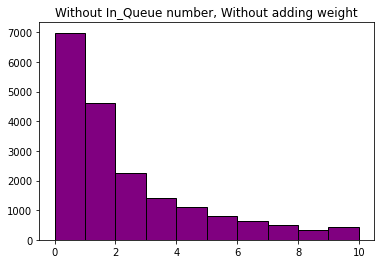

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

plt.title('Without In_Queue number, Without adding weight')
plt.hist(Complete_data['DaysToFinished'], bins=range(0,11,1), edgecolor="black", color='purple')

(array([6985., 4603., 2253., 1407., 1108.,  801.,  640.,  493.,  326.,
           0., 2620.,    0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Patch objects>)

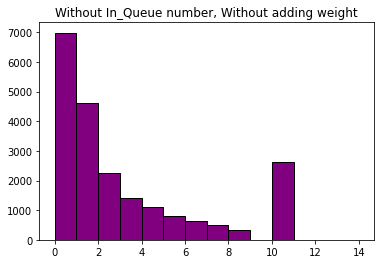

In [ ]:
Complete_data2 = Complete_data.copy()
for i in range(len(Complete_data2)):
  if Complete_data2.iloc[i,10] > 8:
    Complete_data2.iloc[i,10] = 10

plt.title('Without In_Queue number, Without adding weight')
plt.hist(Complete_data2['DaysToFinished'], bins=range(0,15,1), edgecolor="black", color='purple')

In [ ]:
Complete_data2 = Complete_data.copy()

Complete_data2 = Complete_data2[Complete_data2['DaysToFinished'] <= 8]

#Complete_data2 = Complete_data2[Complete_data2['Explanation'].notna()]

X = Complete_data2.loc[:, Complete_data2.columns != 'DaysToFinished']

X = X.loc[:, X.columns != 'Explanation']

Y = Complete_data2['DaysToFinished']

enc=LabelEncoder()

enc.fit(X['Enter_Month'])
X['Enter_Month'] = enc.transform(X['Enter_Month'])

enc.fit(X['Enter_Day_Name'])
X['Enter_Day_Name'] = enc.transform(X['Enter_Day_Name'])

enc.fit(X['Enter_Year'])
X['Enter_Year'] = enc.transform(X['Enter_Year'])

enc.fit(X['Brand'])
X['Brand'] = enc.transform(X['Brand'])

enc.fit(X['Model'])
X['Model'] = enc.transform(X['Model'])

enc.fit(Y)
y = enc.transform(Y)

X.describe()

,Enter_Month,Enter_Day_Name,Enter_Year,Enter_Time,Brand,Model,Estimated_Price,Received_in_Day,In_Queue,تصوير,...,يکسره,چسب,مش,ريخته,بلوتوث,ايراد,وهيت,ميشه,دوتايي,Length
count,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,1.861600e+04,18616.000000,18616.000000,18616.000000,...,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000,18616.000000
mean,5.320101,2.408144,1.594865,14.088328,9.574452,1025.559411,1.276855e+10,232.980071,44.828696,0.292007,...,0.000645,0.000322,0.000483,0.000483,0.000752,0.000483,0.000376,0.000698,0.000430,4.500645
std,3.543169,1.740620,1.035353,2.589888,7.959138,577.001949,5.515316e+11,55.417066,12.262092,0.454698,...,0.025382,0.017950,0.021983,0.021983,0.027414,0.021983,0.019388,0.026417,0.020726,3.149545
min,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,12.000000,2.000000,576.000000,8.000000e+05,200.000000,37.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.000000,2.000000,2.000000,13.966667,4.000000,983.000000,1.300000e+06,233.000000,44.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,8.000000,4.000000,2.000000,16.166667,15.000000,1520.000000,2.425000e+06,262.000000,52.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,11.000000,5.000000,3.000000,23.800000,29.000000,2002.000000,5.500000e+13,454.000000,105.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = X.loc[:, X.columns != 'Model']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
5    Estimated_Price  5.152818e+14
6    Received_in_Day  6.117732e+02
11             تعويض  3.397011e+02
10            احتمال  2.176277e+02
13             تاييد  2.043263e+02
9              خاموش  2.009518e+02
7           In_Queue  1.490276e+02
18             خارجي  9.311345e+01
16           مادربرد  8.935721e+01
313           Length  7.799728e+01


[6.81151153e-02 5.87445208e-02 3.28849509e-02 1.01699707e-01
 7.21774777e-02 8.25248630e-02 9.99917008e-02 8.62116952e-02
 8.64355894e-03 4.09053852e-03 4.02706586e-03 9.35595384e-03
 7.30943547e-03 4.13153783e-03 6.87316768e-03 6.71128807e-03
 5.00247927e-03 5.10093365e-03 5.57736478e-03 4.89357814e-03
 4.74539158e-03 4.97223896e-03 4.28128462e-03 5.63309776e-03
 5.01670648e-03 5.00981423e-03 4.86018181e-03 3.11813012e-03
 3.77798437e-03 3.20885582e-03 3.18530304e-03 3.10647411e-03
 4.66511973e-03 4.25543863e-03 4.02095015e-03 2.55751022e-03
 4.58896516e-03 3.46989367e-03 4.80473387e-03 3.26016208e-03
 4.52182435e-03 3.05390214e-03 3.80894018e-03 3.30145033e-03
 1.78727853e-03 2.42702257e-03 3.60753319e-03 1.94189596e-03
 3.13377334e-03 2.77402561e-03 2.79569424e-03 2.87380406e-03
 2.62495015e-03 3.23779516e-03 2.06659785e-03 2.82283435e-03
 2.20766089e-03 1.95855808e-03 1.12228966e-03 2.45553308e-03
 1.04005276e-03 2.84512269e-03 2.78926029e-03 1.49628301e-03
 2.55744969e-03 1.755426

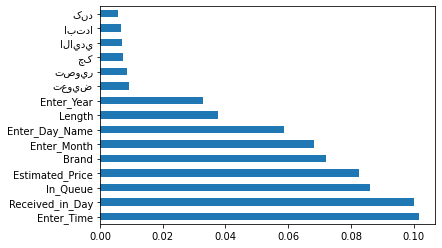

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X.shape
X_new = SelectKBest(chi2, k=100).fit_transform(X, y)
X_new.shape

ExtraTreesClassifier()

In [ ]:
X = pd.concat([X,pd.get_dummies(X['Enter_Month'])],1)
X = pd.concat([X,pd.get_dummies(X['Enter_Day_Name'])],1)
X = pd.concat([X,pd.get_dummies(X['Enter_Year'])],1)
X = pd.concat([X,pd.get_dummies(X['Brand'])],1)
#X = pd.concat([X,pd.get_dummies(X['Model'])],1)

X = X.loc[:, X.columns != 'Enter_Month']
X = X.loc[:, X.columns != 'Enter_Day_Name']
X = X.loc[:, X.columns != 'Enter_Year']
X = X.loc[:, X.columns != 'Brand']
X = X.loc[:, X.columns != 'Model']

X.shape[1]
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


,Enter_Time,Estimated_Price,Received_in_Day,In_Queue,تصوير,خاموش,احتمال,تعويض,چک,تاييد,...,20,21,22,23,24,25,26,27,28,29
0,16.333333,475000.0,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,16.233333,800000.0,9,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.050000,0.0,12,17,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.216667,950000.0,28,44,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,11.400000,0.0,30,44,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,14.066667,4150000.0,10,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21232,15.066667,0.0,10,7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21233,15.683333,7800000.0,11,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21234,16.416667,5240000.0,11,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) 

X_train_N = X_train.copy()
X_test_N = X_test.copy()

X_train_N = X_train_N.loc[:, X_train_N.columns != 'In_Queue']
X_train_N = X_train_N.loc[:, X_train_N.columns != 'Received_in_Day']

X_test_N = X_test_N.loc[:, X_test_N.columns != 'In_Queue']
X_test_N = X_test_N.loc[:, X_test_N.columns != 'Received_in_Day']

mms = MinMaxScaler()

mms.fit(X_train)
X_train = mms.transform(X_train)
mms.fit(X_test)
X_test = mms.transform(X_test)

mms.fit(X_train_N)
X_train_N = mms.transform(X_train_N)
mms.fit(X_test_N)
X_test_N = mms.transform(X_test_N)

from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

#mean_squared_logarithmic_error

In [ ]:
a = np.zeros((len(y_train),1))
for i in range(len(a)):
  a[i] = np.random.exponential(scale=4.56)

In [ ]:
f = lambda a: (abs(a)+a)/2 

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(64, activation='relu')(dense_layer_2)
output = (Dense(1)(dense_layer_3))

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1, validation_split=0.1)

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,f(pred))))

pred = model.predict(X_test)
print((mean_absolute_error(y_test,pred)))

Epoch 1/30
56/56 [==============================] - 2s 16ms/step - loss: 4.4037 - mean_squared_error: 4.4037 - val_loss: 4.0666 - val_mean_squared_error: 4.0666
Epoch 2/30
56/56 [==============================] - 1s 13ms/step - loss: 3.9809 - mean_squared_error: 3.9809 - val_loss: 4.0512 - val_mean_squared_error: 4.0512
Epoch 3/30
56/56 [==============================] - 1s 12ms/step - loss: 3.8648 - mean_squared_error: 3.8648 - val_loss: 4.0811 - val_mean_squared_error: 4.0811
Epoch 4/30
56/56 [==============================] - 1s 13ms/step - loss: 3.7377 - mean_squared_error: 3.7377 - val_loss: 4.1352 - val_mean_squared_error: 4.1352
Epoch 5/30
56/56 [==============================] - 1s 13ms/step - loss: 3.5014 - mean_squared_error: 3.5014 - val_loss: 4.3254 - val_mean_squared_error: 4.3254
Epoch 6/30
56/56 [==============================] - 1s 13ms/step - loss: 3.1711 - mean_squared_error: 3.1711 - val_loss: 4.3528 - val_mean_squared_error: 4.3528
Epoch 7/30
56/56 [================

In [ ]:
f=lambda a: (abs(a)+a)/2 
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(256, activation='relu')(input_layer)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
output = (Dense(1)(dense_layer_3))

model2 = Model(inputs=input_layer, outputs=output)
model2.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history2 = model2.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1, validation_split=0.1)

pred_train2 = model2.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train2)))

pred2 = model2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred2)))
print((mean_absolute_error(y_test,(pred2))))

Epoch 1/30
56/56 [==============================] - 1s 11ms/step - loss: 4.5638 - mean_squared_error: 4.5638 - val_loss: 4.0978 - val_mean_squared_error: 4.0978
Epoch 2/30
56/56 [==============================] - 0s 8ms/step - loss: 4.0293 - mean_squared_error: 4.0293 - val_loss: 4.0207 - val_mean_squared_error: 4.0207
Epoch 3/30
56/56 [==============================] - 1s 9ms/step - loss: 3.9312 - mean_squared_error: 3.9312 - val_loss: 4.0484 - val_mean_squared_error: 4.0484
Epoch 4/30
56/56 [==============================] - 0s 8ms/step - loss: 3.8538 - mean_squared_error: 3.8538 - val_loss: 4.0810 - val_mean_squared_error: 4.0810
Epoch 5/30
56/56 [==============================] - 0s 8ms/step - loss: 3.7485 - mean_squared_error: 3.7485 - val_loss: 4.1006 - val_mean_squared_error: 4.1006
Epoch 6/30
56/56 [==============================] - 0s 8ms/step - loss: 3.6035 - mean_squared_error: 3.6035 - val_loss: 4.2479 - val_mean_squared_error: 4.2479
Epoch 7/30
56/56 [=====================

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) 
mms.fit(X_train)
X_train = mms.transform(X_train)
mms.fit(X_test)
X_test = mms.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


100819272557.92688
1.1115284842688082
86.1058939466399
1.117436448263516
86.03204439670606


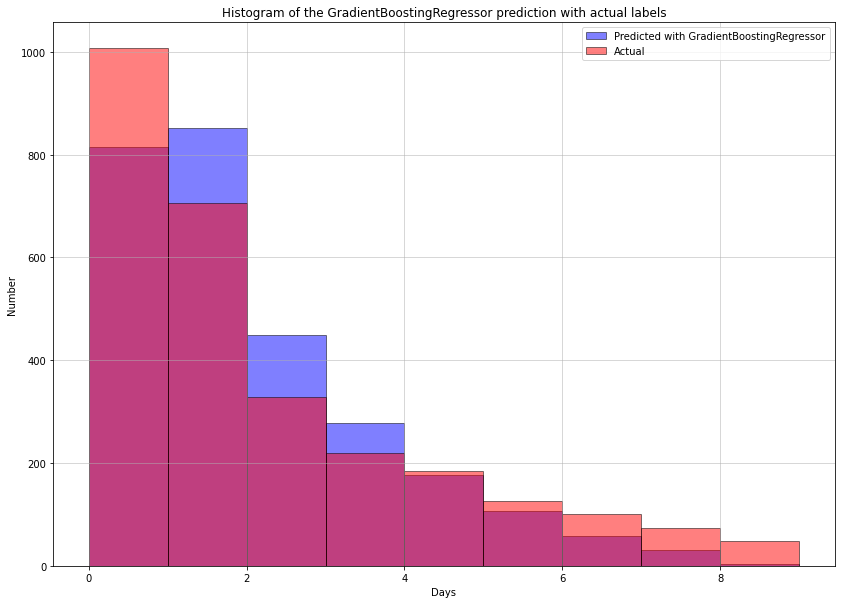

In [ ]:
pred_train = model.predict(X_train)
print(mean_absolute_error(y_train,pred_train))

pred = f(model.predict(X_test))
pred2 = np.floor(f(model2.predict(X_test)))

print(mean_absolute_error(y_test,pred))
print(((8-mean_absolute_error(y_test,pred))/8)*100)

print(mean_absolute_error(y_test,pred2))
print(((8-mean_absolute_error(y_test,pred2))/8)*100)

plt.figure(figsize=(14, 10))
plt.title('Histogram of the GradientBoostingRegressor prediction with actual labels')
plt.xlabel('Days')
plt.ylabel('Number')
#plt.hist(pred, bins=range(0,10,1), edgecolor="black", color='red', alpha=0.5)
plt.hist(y_pred6, bins=range(0,10,1), edgecolor="black", color='blue', alpha=0.5)
plt.hist(y_test, bins=range(0,10,1), edgecolor="black", color='red', alpha=0.5)

plt.grid(linestyle='-', linewidth=0.5)
plt.legend(['Predicted with GradientBoostingRegressor','Actual'])
plt.show()

1.0485772795274892
1.362701599326705
49.90167857949208
1.4330334170646968
52.477206313815394


Text(0.5, 1.0, 'With In_Queue number, Without adding weight')

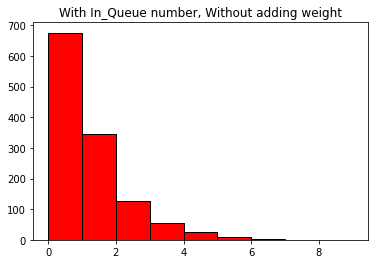

In [ ]:
pred_train2 = model2.predict(X_train)
print(np.sqrt(mean_absolute_error(y_train,pred_train2)))


pred2 = (model2.predict(X_test))

f=lambda a: (abs(a)+a)/2 
pred22 = np.ceil(f(pred2))
predd22 = ((pred22 - min(pred22))*8/(max(pred22)-min(pred22)))

print(np.sqrt(mean_absolute_error(y_test,pred2)))
print(np.sqrt(mean_absolute_error(y_test,pred2)*len(X_test)))

print(np.sqrt(mean_absolute_error(y_test,predd22)))
print(np.sqrt(mean_absolute_error(y_test,predd22)*len(X_test)))

plt.title('With In_Queue number, Without adding weight')
plt.hist(pred2, bins=range(0,10,1), edgecolor="black", color='red')

plt.title('With In_Queue number, Without adding weight')
#plt.hist(pred2, bins=range(0,10,1), edgecolor="black", color='yellow')

In [ ]:
#Regression Models
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
regressor1 = LinearRegression()
regressor2 = PoissonRegressor()
regressor3 = BayesianRidge()
regressor4 = SVR(kernel = 'rbf')
regressor5 = RandomForestRegressor(n_estimators=500, max_features='auto', random_state=0 , max_depth = 20)
regressor6 = GradientBoostingRegressor(loss='squared_error', n_estimators = 200, max_depth = 20, max_features = 'auto')


In [ ]:
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)
regressor3.fit(X_train, y_train)
regressor4.fit(X_train, y_train)
regressor5.fit(X_train, y_train)
regressor6.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20, max_features='auto', n_estimators=200)

In [ ]:
y_train1 = regressor1.predict(X_train)
y_train2 = regressor2.predict(X_train)
y_train3 = regressor3.predict(X_train)
y_train4 = regressor4.predict(X_train)
y_train5 = regressor5.predict(X_train)
y_train6 = regressor6.predict(X_train)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) 


In [ ]:
pred = model.predict(X_test)
pred2 = model2.predict(X_test)
y_pred1 = regressor1.predict(X_test)
y_pred2 = regressor2.predict(X_test)
y_pred3 = regressor3.predict(X_test)
y_pred4 = regressor4.predict(X_test)
y_pred5 = regressor5.predict(X_test)
y_pred6 = regressor6.predict(X_test)

(array([1.314e+03, 1.315e+03, 1.380e+02, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

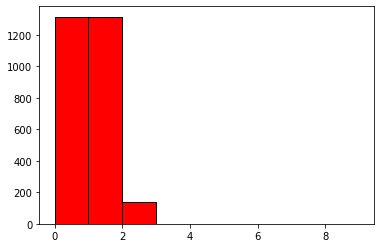

In [ ]:
plt.hist(y_pred6, bins=range(0,10,1), edgecolor="black", color='red')

In [ ]:
l = np.zeros((50,2))
l = pd.DataFrame(l)
for i in range(25):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) 
  mms.fit(X_test)
  X_test = mms.transform(X_test)
  pred = f(model.predict(X_test))
  pred2 = f(model2.predict(X_test))
  l.iloc[i,0] = ((8 - mean_absolute_error(y_test,pred))/8)*100
  l.iloc[49 - i,0] = ((8 - mean_absolute_error(y_test,pred2))/8)*100
  l.iloc[i,1] = 'Number_1'
  l.iloc[49 - i,1] = 'Number_2'


sns.boxplot(x=l.iloc[:,0], y=l.iloc[:,1], linewidth=5)
plt.show()
#mean_Square_Error

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

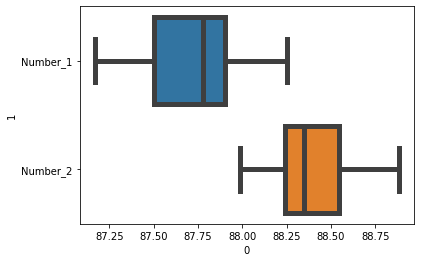

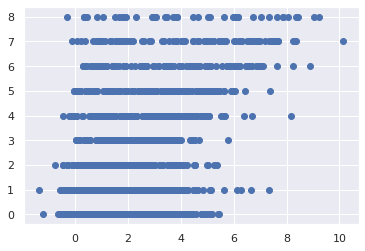

In [ ]:
plt.scatter((pred),y_test)

In [ ]:
from google.colab import files
df = pd.DataFrame(l)
df.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

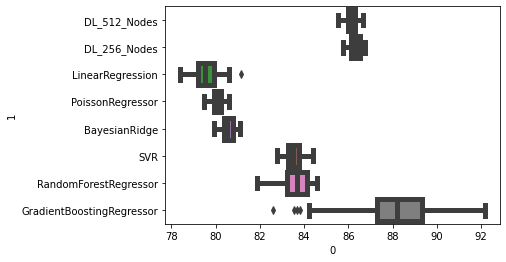

In [ ]:
lenn = 50
f=lambda a: (abs(a)+a)/2 
l = np.zeros((8*lenn,2))
l = pd.DataFrame(l)
counter = 0
for i in range(lenn):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) 
  mms.fit(X_test)
  X_test = mms.transform(X_test)
  pred = f(model.predict(X_test))
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(pred)))/8)*100
  l.iloc[counter,1] = 'DL_512_Nodes'
  counter = counter + 1
  pred2 = f(model2.predict(X_test))
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(pred2)))/8)*100
  l.iloc[counter,1] = 'DL_256_Nodes'
  counter = counter + 1
  y_pred1 = regressor1.predict(X_test)
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(y_pred1)))/8)*100
  l.iloc[counter,1] = 'LinearRegression'
  counter = counter + 1
  y_pred2 = regressor2.predict(X_test)
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(y_pred2)))/8)*100
  l.iloc[counter,1] = 'PoissonRegressor'
  counter = counter + 1
  y_pred3 = regressor3.predict(X_test)
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(y_pred3)))/8)*100
  l.iloc[counter,1] = 'BayesianRidge'
  counter = counter + 1
  y_pred4 = regressor4.predict(X_test)
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(y_pred4)))/8)*100
  l.iloc[counter,1] = 'SVR'
  counter = counter + 1
  y_pred5 = regressor5.predict(X_test)
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(y_pred5)))/8)*100
  l.iloc[counter,1] = 'RandomForestRegressor'
  counter = counter + 1
  y_pred6 = regressor6.predict(X_test)
  l.iloc[counter,0] = ((8 - mean_absolute_error(y_test,f(y_pred6)))/8)*100
  l.iloc[counter,1] = 'GradientBoostingRegressor'
  counter = counter + 1

sns.boxplot(x=l.iloc[:,0], y=l.iloc[:,1], linewidth=5)
plt.show()

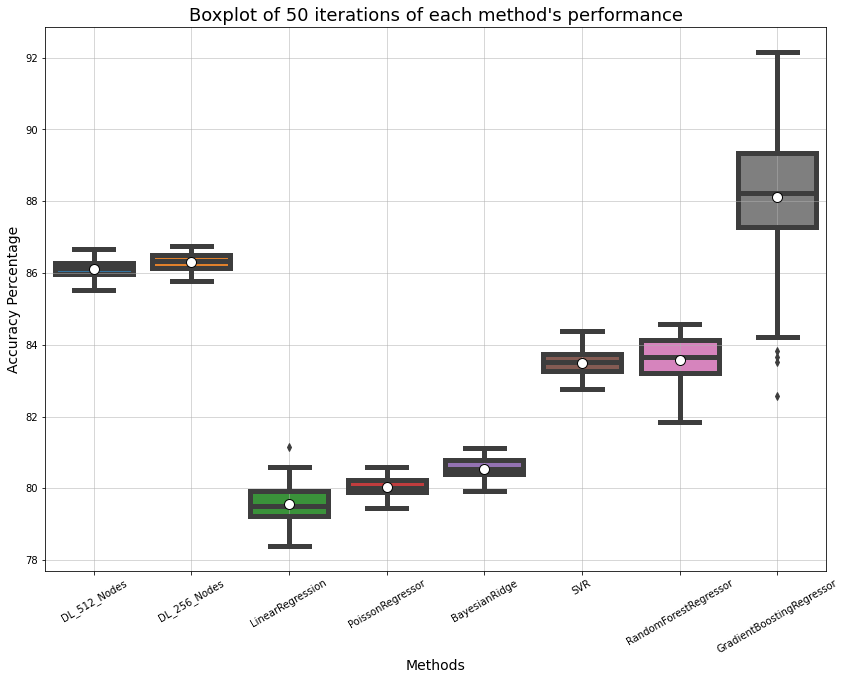

In [ ]:
plt.figure(figsize=(14, 10))
ax = sns.boxplot(x=l.iloc[:,1], y=l.iloc[:,0], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.grid(linestyle='-', linewidth=0.5)
plt.ylabel("Accuracy Percentage", size=14)
plt.xlabel("Methods", size=14)
plt.title("Boxplot of 50 iterations of each method's performance", size=18)
plt.show()

In [ ]:
((8 - mean_absolute_error(y_test,y_pred5))/8)*100

83.65165559188702

In [ ]:
pred = f(model.predict(X_test))
pred2 = f(model2.predict(X_test))
y_pred1 = f(regressor1.predict(X_test))
y_pred2 = f(regressor2.predict(X_test))
y_pred3 = f(regressor3.predict(X_test))
y_pred4 = f(regressor4.predict(X_test))
y_pred5 = f(regressor5.predict(X_test))
y_pred6 = f(regressor6.predict(X_test))

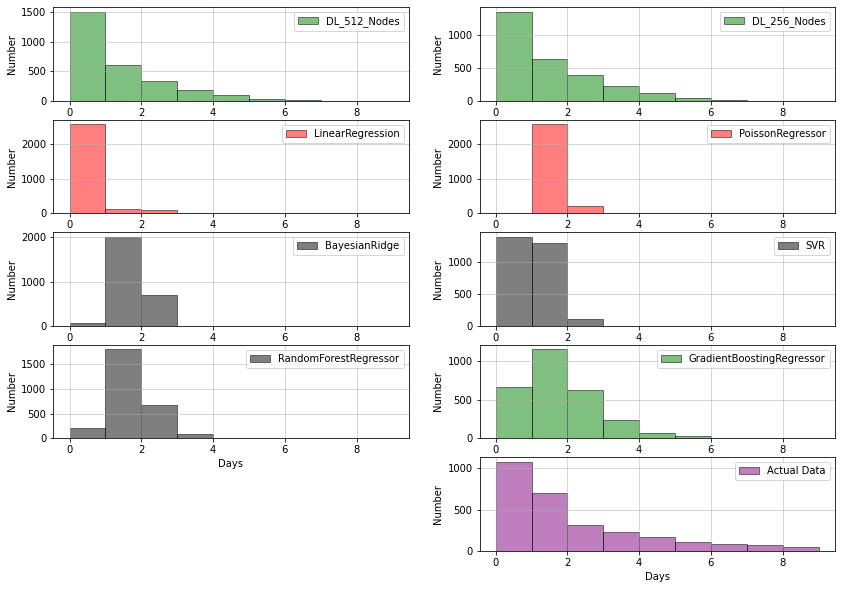

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(5, 2, 1)
plt.hist(pred, bins=range(0,10,1), edgecolor="black", color='green', alpha=0.5)
plt.legend(['DL_512_Nodes'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 2)
plt.hist(pred2, bins=range(0,10,1), edgecolor="black", color='green', alpha=0.5)
plt.legend(['DL_256_Nodes'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 3)
plt.hist(y_pred1, bins=range(0,10,1), edgecolor="black", color='red', alpha=0.5)
plt.legend(['LinearRegression'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 4)
plt.hist(y_pred2, bins=range(0,10,1), edgecolor="black", color='red', alpha=0.5)
plt.legend(['PoissonRegressor'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 5)
plt.hist(y_pred3, bins=range(0,10,1), edgecolor="black", color='black', alpha=0.5)
plt.legend(['BayesianRidge'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 6)
plt.hist(y_pred4, bins=range(0,10,1), edgecolor="black", color='black', alpha=0.5)
plt.legend(['SVR'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 7)
plt.hist(y_pred5, bins=range(0,10,1), edgecolor="black", color='black', alpha=0.5)
plt.legend(['RandomForestRegressor'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 8)
plt.hist(y_pred6, bins=range(0,10,1), edgecolor="black", color='green', alpha=0.5)
plt.legend(['GradientBoostingRegressor'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)
plt.subplot(5, 2, 10)
plt.hist(y_test, bins=range(0,10,1), edgecolor="black", color='purple', alpha=0.5)
plt.legend(['Actual Data'])
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(linestyle='-', linewidth=0.5)

In [ ]:
df = pd.read_csv('/content/EvaluationsOfPerformance.csv',na_values=' ') 

In [ ]:
df

,0,1
0,85.702261,DL_512_Nodes
1,86.018226,DL_256_Nodes
2,78.609197,LinearRegression
3,79.669993,PoissonRegressor
4,80.277939,BayesianRidge
...,...,...
395,79.919957,PoissonRegressor
396,80.429303,BayesianRidge
397,83.184820,SVR
398,83.651656,RandomForestRegressor


In [ ]:
(df[df.iloc[:,1] == 'DL_512_Nodes'].iloc[:,0])

0      85.702261
8      86.395228
16     85.990054
24     86.091247
32     86.324996
40     86.411064
48     85.935757
56     86.296309
64     86.252690
72     86.625905
80     85.876627
88     85.901118
96     86.041044
104    86.114356
112    85.745458
120    86.432173
128    86.438976
136    86.316452
144    85.808316
152    86.137471
160    85.525972
168    86.253254
176    86.456613
184    86.179624
192    86.148895
200    85.974192
208    85.538014
216    85.898131
224    86.662016
232    86.026211
240    85.914950
248    86.219645
256    86.285345
264    86.179878
272    85.592765
280    86.067263
288    86.448629
296    86.205259
304    86.203152
312    86.051158
320    86.257280
328    85.990779
336    85.997279
344    86.245643
352    86.069486
360    85.976792
368    86.324048
376    86.148747
384    86.536658
392    86.105894
Name: 0, dtype: float64

In [ ]:
from scipy.stats import f_oneway
f_oneway(df[df.iloc[:,1] == 'PoissonRegressor'].iloc[:,0], df[df.iloc[:,1] == 'LinearRegression'].iloc[:,0])

F_onewayResult(statistic=26.667697824880925, pvalue=1.2691378056035746e-06)

In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df[df.iloc[:,1] == 'DL_512_Nodes'].iloc[:,0], 
                                df[df.iloc[:,1] == 'DL_256_Nodes'].iloc[:,0],
                                df[df.iloc[:,1] == 'LinearRegression'].iloc[:,0],
                                df[df.iloc[:,1] == 'PoissonRegressor'].iloc[:,0],
                                df[df.iloc[:,1] == 'BayesianRidge'].iloc[:,0],
                                df[df.iloc[:,1] == 'SVR'].iloc[:,0],
                                df[df.iloc[:,1] == 'RandomForestRegressor'].iloc[:,0],  
                                df[df.iloc[:,1] == 'GradientBoostingRegressor'].iloc[:,0])

In [ ]:
print(fvalue, pvalue)

678.8311859259842 1.012014928371233e-214


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tukey = pairwise_tukeyhsd(endog=df.iloc[:,0],
                          groups=df.iloc[:,1],
                          alpha=0.05)

IndexError: ignored

In [ ]:
print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
            BayesianRidge              DL_256_Nodes   5.7667  0.001  5.2357  6.2977   True
            BayesianRidge              DL_512_Nodes   5.5721  0.001  5.0411  6.1031   True
            BayesianRidge GradientBoostingRegressor   7.5526  0.001  7.0216  8.0836   True
            BayesianRidge          LinearRegression  -0.9815  0.001 -1.5125 -0.4505   True
            BayesianRidge          PoissonRegressor  -0.5129 0.0672 -1.0439  0.0181  False
            BayesianRidge     RandomForestRegressor   3.0298  0.001  2.4988  3.5608   True
            BayesianRidge                       SVR   2.9472  0.001  2.4162  3.4782   True
             DL_256_Nodes              DL_512_Nodes  -0.1946    0.9 -0.7256  0.3364  False

In [ ]:
fvalue, pvalue = stats.f_oneway(df[df.iloc[:,1] == 'SVR'].iloc[:,0], 
                                df[df.iloc[:,1] == 'RandomForestRegressor'].iloc[:,0])

print(fvalue, pvalue)

0.5858025562388829 0.44588621792292604


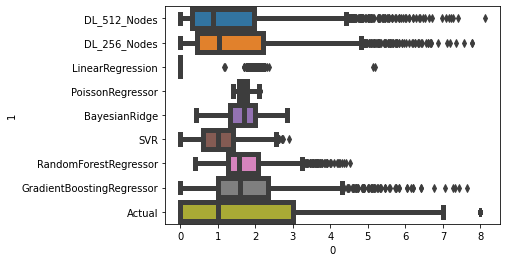

In [ ]:
lenn = len(y_test)
l = np.zeros((9*lenn,2))
l = pd.DataFrame(l)
counter = 0
for i in range(lenn):
  l.iloc[counter,0] = pred[i][0]
  l.iloc[counter,1] = 'DL_512_Nodes'
  counter = counter + 1
  l.iloc[counter,0] = pred2[i][0]
  l.iloc[counter,1] = 'DL_256_Nodes'
  counter = counter + 1
  l.iloc[counter,0] = y_pred1[i]
  l.iloc[counter,1] = 'LinearRegression'
  counter = counter + 1
  l.iloc[counter,0] = y_pred2[i]
  l.iloc[counter,1] = 'PoissonRegressor'
  counter = counter + 1
  l.iloc[counter,0] = y_pred3[i]
  l.iloc[counter,1] = 'BayesianRidge'
  counter = counter + 1
  l.iloc[counter,0] = y_pred4[i]
  l.iloc[counter,1] = 'SVR'
  counter = counter + 1
  l.iloc[counter,0] = y_pred5[i]
  l.iloc[counter,1] = 'RandomForestRegressor'
  counter = counter + 1
  l.iloc[counter,0] = y_pred6[i]
  l.iloc[counter,1] = 'GradientBoostingRegressor'
  counter = counter + 1
  l.iloc[counter,0] = y_test[i]
  l.iloc[counter,1] = 'Actual'
  counter = counter + 1


sns.boxplot(x=l.iloc[:,0], y=l.iloc[:,1], linewidth=5)
plt.show()

In [ ]:
tukey = pairwise_tukeyhsd(endog=l.iloc[:,0],
                          groups=l.iloc[:,1],
                          alpha=0.001)

print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.00                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
                   Actual             BayesianRidge   0.0528 0.6165 -0.0651  0.1707  False
                   Actual              DL_256_Nodes  -0.1468  0.001 -0.2647 -0.0289   True
                   Actual              DL_512_Nodes  -0.3182  0.001 -0.4361 -0.2003   True
                   Actual GradientBoostingRegressor   0.1468  0.001  0.0289  0.2647   True
                   Actual          LinearRegression  -1.4658  0.001 -1.5837 -1.3479   True
                   Actual          PoissonRegressor   0.0746 0.1696 -0.0433  0.1925  False
                   Actual     RandomForestRegressor   0.0812 0.0947 -0.0367  0.1991  False
                   Actual                       SVR   -0.606  0.001 -0.7239 -0.4882   True

In [ ]:
fvalue, pvalue = stats.f_oneway(l[l.iloc[:,1] == 'Actual'].iloc[:,0], 
                                l[l.iloc[:,1] == 'DL_256_Nodes'].iloc[:,0])

print(fvalue, pvalue)

10.12100806479349 0.0014739163162031132


In [ ]:
fvalue, pvalue = stats.f_oneway(l[l.iloc[:,1] == 'Actual'].iloc[:,0], 
                                l[l.iloc[:,1] == 'DL_512_Nodes'].iloc[:,0])

print(fvalue, pvalue)

48.70211836620933 3.3254950377708046e-12


In [ ]:
fvalue, pvalue = stats.f_oneway(l[l.iloc[:,1] == 'Actual'].iloc[:,0], 
                                l[l.iloc[:,1] == 'GradientBoostingRegressor'].iloc[:,0])

print(fvalue, pvalue)

11.686084476986485 0.0006341952769908283
